In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
Min, Max, N = 0.,40.,75
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [ ]:
def h1(y):
    return 75.
def h2(y):
    return 50.
def h3(x):
    return 100.
def h4(x):
    return 0.

In [ ]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [ ]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax

In [ ]:
T = InitT()

In [ ]:
omegas = np.linspace(1.0,1.9,50)

In [ ]:
itmax= np.array([])
for i in range(len(omegas)):
    T = InitT()
    Tf1,itmax_ =  GetRelaxation(T, omega = omegas[i])
    itmax = np.append(itmax,itmax_)

In [ ]:
fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(omegas,itmax)
ax.grid()
ax.set_title("Optimization of the Over-relaxation Method")
ax.set_xlabel("$\omega $")
ax.set_ylabel("${Iterations}$")

problem constants:

In [2]:
V0 = 1
nu = 0.2
N = 51
h = 0.02
R = V0*nu/h
# obstacle borders and slices
x0,y0 = 5,5
xf,yf = 25,30
xs = slice(x0,xf)
ys = slice(y0,yf)
# simlation parameters
sub_relaxation = 0.2

define the current and vorticity arrays

In [3]:
u = np.zeros((N,N))
w = np.zeros((N,N))

solve the navier stokes equations by subrelaxation

In [4]:
for i in tqdm(range(2500),ncols=100):
    # obstacle boundary conditions
    u[xs,ys] = 0
    w[xs,ys] = 0
    w[[x0,xf],ys] = -2*( u[[x0-1,xf+1],ys] - u[[x0,xf],ys] )/h**2
    w[xs,[y0,yf]] = -2*( u[xs,[y0-1,yf+1]] - u[xs,[y0,yf]] )/h**2
    # pool boundary conditions
    u[:,0] = 0
    u[[0,-1],:] = u[[1,-2],:]
    u[:,-1] = u[:,-2] + h*V0
    w[[0,-1],:] = 0
    w[:,[0,-1]] = 0
    w[-1,:] = w[-2,:]
    # sub relaxation
    for i in range(1,N-1):
        for j in range(1,N-1):
            u[i,j] += ((u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]+h**2*w[i,j])/4-u[i,j])*sub_relaxation 
    #for i in range(1,N-1):
    #    for j in range(1,N-1):
            w[i,j] += ((w[i+1,j]+w[i-1,j]+w[i,j+1]+w[i,j-1])/4-R/16*(u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])+R/16*(u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1])-w[i,j])*sub_relaxation

100%|███████████████████████████████████████████████████████████| 2500/2500 [02:47<00:00, 14.94it/s]


apply the boundary conditions one last time

In [5]:
# obstacle boundary conditions
u[xs,ys] = 0
w[xs,ys] = 0
w[[x0,xf],ys] = -2*( u[[x0-1,xf+1],ys] - u[[x0,xf],ys] )/h**2
w[xs,[y0,yf]] = -2*( u[xs,[y0-1,yf+1]] - u[xs,[y0,yf]] )/h**2
# pool boundary conditions
u[:,0] = 0
u[[0,-1],:] = u[[1,-2],:]
u[:,-1] = u[:,-2] + h*V0
w[[0,-1],:] = 0
w[:,[0,-1]] = 0
w[-1,:] = w[-2,:]

plot

In [6]:
x,y = h*np.arange(N),h*np.arange(N)
X,Y = np.meshgrid(x,y)

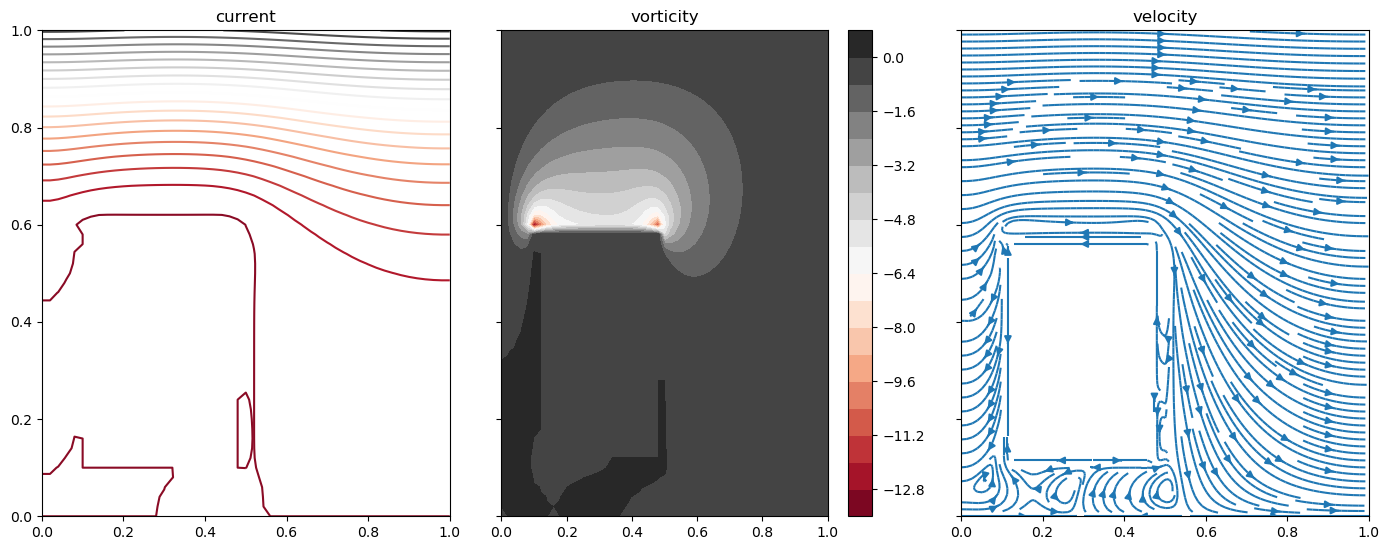

In [8]:
fig,ax = plt.subplots(ncols=3,figsize=1.4*plt.figaspect(0.4),dpi=100,sharey=True,sharex=True)

ax[0].set_title("current")
ax[0].contour(X,Y,u.T,19, cmap = "RdGy")

ax[1].set_title("vorticity")
c = ax[1].contourf(X,Y,w.T,19, cmap = "RdGy")
fig.colorbar(c, ax = ax[1])

ax[2].set_title("velocity")
ax[2].streamplot(X,Y,np.gradient(u.T,axis=0),-np.gradient(u.T,axis=1),density=2.4)

plt.xlim(0,1)
plt.ylim(0,1)

plt.tight_layout()